<h1>Trading Strategy Performance Analysis</h1>
<br>
<h2>Background:</h2>
This project was born out of my passion for trading the markets. It turns out data analytics and trading go hand-in-hand. I started trading before I began high school, about 13 years ago. Back then, I used a simple pen and paper journal to document my trading process and psychology. This is far from that, as I attempt to use the skills I’ve learned in college and professionally to take a deep dive into my personal trading.<br>


<h2>Behind the Data:</h2>
Prior to this project, I created a local database using SQLite consisting of two tables. One table contains daily statistics, and the other stores individual trade statistics. I export this data from my trading platform, SierraChart, at the end of each trading day. Before importing the data, I format it using an Excel template that I created to transform it into a proper CSV format. Additionally, I append the trading data with two custom columns that describe specific aspects of my trading strategy, helping me to quantify and analyze trade types effectively. At this time I am visualizing simple metrics in Grafana through SQL queries, which does not support the level of depth I want to ultimately pursue (regression analysis, model building, etc.), which leads me into...<br>


<h2>Purpose:</h2>
I hope that this project helps me sharpen/showcase my Python capabiliites. Further, since this is a dynamic project focused on improving technical execution, this notebook will continue to evolve as new questions arise and the dataset expands.
<h3>Questions to answer:</h3>
   <li>1. Am I profitable?<br></li> 
   <li>2.....<br></li> 
   <li>3.....<br></li> 

In [21]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Connect to local SQLite database
conn = sqlite3.connect(r'C:\Users\Tyler\Documents\Trading Analytics\sc_trading.db')

In [22]:
#Retrieves all data from tables and transform into DataFrame
daily_stats = pd.read_sql_query("SELECT * FROM DailyStats", conn)
trades = pd.read_sql_query("SELECT * FROM TradeData", conn)

In [23]:
#A snapshot of the data.
daily_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 88 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Date                                         52 non-null     object 
 1   ClosedTradesProfitLossAllTrades              52 non-null     float64
 2   ClosedTradesProfitLossLongTrades             52 non-null     float64
 3   ClosedTradesProfitLossShortTrades            52 non-null     float64
 4   ClosedTradesTotalProfitAllTrades             52 non-null     float64
 5   ClosedTradesTotalProfitLongTrades            52 non-null     float64
 6   ClosedTradesTotalProfitShortTrades           52 non-null     float64
 7   ClosedTradesTotalLossAllTrades               52 non-null     float64
 8   ClosedTradesTotalLossLongTrades              52 non-null     float64
 9   ClosedTradesTotalLossShortTrades             52 non-null     float64
 10  Prof

In [24]:
#A snapshot of the data.
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      177 non-null    object 
 1   Symbol                    177 non-null    object 
 2   TradeType                 177 non-null    object 
 3   EntryDateTime             177 non-null    object 
 4   ExitDateTime              177 non-null    object 
 5   EntryPrice                177 non-null    float64
 6   ExitPrice                 177 non-null    float64
 7   TradeQuantity             177 non-null    int64  
 8   MaxOpenQuantity           177 non-null    int64  
 9   MaxClosedQuantity         177 non-null    int64  
 10  ProfitLossC               177 non-null    float64
 11  CumulativeProfitLossC     177 non-null    float64
 12  FlatToFlatProfitLossC     177 non-null    object 
 13  FlatToFlatMaxOpenProfitC  177 non-null    float64
 14  FlatToFlat

In [25]:
#Calculating basic descriptive statistics. Given the data, primarily checking count to ensure no null values
trades.describe()

,EntryPrice,ExitPrice,TradeQuantity,MaxOpenQuantity,MaxClosedQuantity,ProfitLossC,CumulativeProfitLossC,FlatToFlatMaxOpenProfitC,FlatToFlatMaxOpenLossC,MaxOpenProfitC,MaxOpenLossC,EntryEfficiency,ExitEfficiency,TotalEfficiency,CommissionC,HighPriceWhileOpen,LowPriceWhileOpen,OpenPositionQuantity,ClosePositionQuantity,Initial_risk
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.0,177.000000,177.000000,177.000000,177.000000,177.000000
mean,5593.351469,5594.483164,2.022599,3.531073,2.802260,15.450565,28.468927,73.295198,-30.105932,51.374294,-22.156780,0.910537,0.378096,-0.002904,0.0,5598.163616,5590.163390,3.011299,0.734463,1.694915
std,6081.337459,6082.624740,1.238377,1.965728,1.754991,76.406369,128.782858,134.700679,31.578440,94.868967,22.749262,0.260989,0.295825,0.473022,0.0,6087.479564,6076.399392,1.783729,1.248908,0.461750
min,70.860000,70.660000,1.000000,1.000000,1.000000,-108.000000,-293.750000,0.000000,-196.000000,0.000000,-108.000000,0.000000,0.000000,-1.000000,0.0,71.000000,70.660000,1.000000,0.000000,1.000000
25%,73.520000,73.540000,1.000000,2.000000,1.000000,-12.000000,-24.000000,15.000000,-42.000000,10.500000,-32.000000,1.000000,0.125000,-0.237000,0.0,73.580000,73.350000,2.000000,0.000000,1.000000
50%,6028.250000,6033.250000,1.000000,3.000000,3.000000,0.000000,23.000000,40.000000,-18.750000,29.000000,-12.500000,1.000000,0.318000,0.000000,0.0,6035.250000,6025.500000,3.000000,0.000000,2.000000
75%,6087.500000,6089.000000,3.000000,5.000000,4.000000,25.000000,75.000000,97.500000,-7.500000,60.000000,-6.250000,1.000000,0.600000,0.250000,0.0,6090.750000,6086.000000,4.000000,1.000000,2.000000
max,21877.000000,21866.750000,5.000000,10.000000,10.000000,720.000000,1030.000000,1540.000000,0.000000,1060.000000,0.000000,1.000000,1.000000,1.000000,0.0,21886.250000,21864.000000,10.000000,5.000000,2.000000


In [26]:
#Calculating basic descriptive statistics. Given the data, primarily checking count to ensure no null values
daily_stats.describe()

,ClosedTradesProfitLossAllTrades,ClosedTradesProfitLossLongTrades,ClosedTradesProfitLossShortTrades,ClosedTradesTotalProfitAllTrades,ClosedTradesTotalProfitLongTrades,ClosedTradesTotalProfitShortTrades,ClosedTradesTotalLossAllTrades,ClosedTradesTotalLossLongTrades,ClosedTradesTotalLossShortTrades,ProfitFactorAllTrades,...,AverageLosingTradeAllTrades,AverageLosingTradeLongTrades,AverageLosingTradeShortTrades,AverageProfitFactorAllTrades,AverageProfitFactorLongTrades,AverageProfitFactorShortTrades,LargestWinningTradeAllTrades,LargestLosingTradeAllTrades,MaxConsecutiveWinnersAllTrades,MaxConsecutiveLosersAllTrades
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,...,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,35.475962,16.615385,18.860577,1096.995192,509.355769,587.639423,-1061.519231,-492.740385,-568.778846,4.585577,...,-110.274038,-81.739615,-103.641538,2.230192,0.978846,2.839615,372.379808,-212.081731,3.673077,4.884615
std,912.144782,507.914504,730.371133,803.840740,611.493215,669.467564,955.322410,582.134420,628.494858,14.661535,...,59.982267,65.441463,73.796736,5.486405,1.034608,9.942057,243.106541,127.615612,1.896552,3.644248
min,-2595.000000,-1190.000000,-1975.000000,0.000000,0.000000,0.000000,-4430.000000,-3230.000000,-2567.500000,0.000000,...,-260.000000,-206.670000,-260.000000,0.000000,0.000000,0.000000,0.000000,-500.000000,0.000000,0.000000
25%,-891.875000,-333.125000,-303.125000,504.250000,34.375000,11.875000,-1551.875000,-696.250000,-817.500000,0.670000,...,-153.990000,-126.207500,-149.795000,0.827500,0.000000,0.000000,158.250000,-263.750000,2.000000,2.000000
50%,301.625000,21.000000,0.000000,960.000000,263.750000,268.750000,-981.250000,-407.500000,-293.750000,1.395000,...,-111.815000,-97.250000,-100.000000,1.275000,0.750000,0.900000,350.000000,-200.000000,3.000000,5.000000
75%,561.875000,292.687500,371.875000,1668.750000,709.375000,1038.750000,-305.000000,-36.000000,-118.750000,2.282500,...,-72.042500,-4.642500,-45.832500,1.825000,1.615000,1.977500,528.750000,-134.375000,5.000000,7.000000
max,1600.000000,1365.000000,1600.000000,3045.000000,2450.000000,3000.000000,0.000000,0.000000,0.000000,80.000000,...,0.000000,0.000000,0.000000,40.000000,4.300000,71.670000,940.000000,0.000000,10.000000,16.000000


<h2>Question 1: Am I profitable?</h2>
<h2>Answer: Yes</h2>
The simplest way to answer this question is to look at the daily statistics table and sum up the daily profit/loss (PnL). I chose to visualize this with a scatter plot to observe potential trends in profitability over time. To enhance the analysis, I included a date filter, which allows me to focus on specific periods of interest.<br>
<br>This is particularly useful because the size of my trading account fluctuates depending on the prop firm I am trading with. Since smaller accounts have less leverage, a strong performance day will not have the same notional value as a a strong performance day on a larger account with more leverage. By filtering for specific time frames with similarly sized accounts, I can better evaluate the magnitude of profitability. <br>

In [27]:
#Create Date Filter
#Convert 'Date' column to datetime format from object
daily_stats['Date'] = pd.to_datetime(daily_stats['Date'], errors='coerce')
# Define the date range for filter
start_date = '2025-01-01'
end_date = '2025-02-10'
#Create filter
filtered_stats = daily_stats[(daily_stats['Date'] >= start_date) & (daily_stats['Date'] <= end_date)]

Trading Days: 10
PnL: $2734.75 USD
Avg. PnL/Day: $273 USD


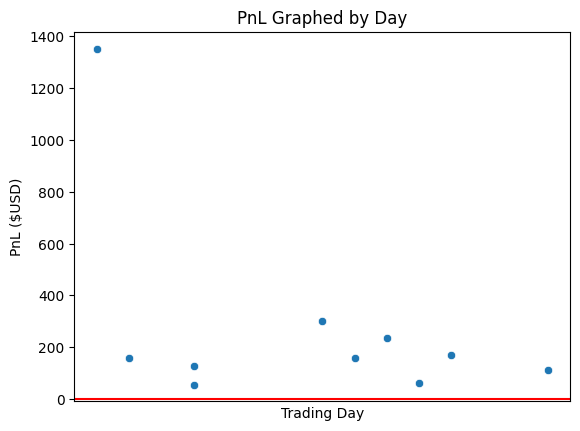

In [28]:
#PnL Graphed by Day
sns.scatterplot(x='Date', y='ClosedTradesProfitLossAllTrades', data=filtered_stats)
plt.title('PnL Graphed by Day')
plt.ylabel('PnL ($USD)')
plt.xlabel('Trading Day')
#Hide Date Label
plt.xticks([])
#Add line @ y=0 for visual reference of breakeven point
plt.axhline(y=0, color='red')
#Calculate Total Days
total_days = len(filtered_stats)
print(f"Trading Days: {total_days}")
#Calculate Total PnL
pnl = filtered_stats['ClosedTradesProfitLossAllTrades'].sum()
print(f"PnL: ${pnl} USD")
#Calculate Avg. PnL per Day
avg_pnl_day = pnl / total_days
print(f"Avg. PnL/Day: ${avg_pnl_day:.0f} USD")